# Objective

# The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

## Step 1: Understand the Problem and the Data

# Business Objective:

The goal is to analyze factors affecting solar power generation and identify key variables that influence power output to optimize solar farm efficiency.

# Understanding the Data:
The dataset contains variables such as temperature, wind-speed, humidity, and solar-irradiance, which may influence the power-generated. Each of these variables represents environmental conditions or system inputs that could impact the efficiency of solar panels.
 
# Data Types:

The dataset includes numerical data types for environmental variables like temperature (float) and categorical data types for weather-conditions (object), which may require preprocessing.

# Data Quality:

We need to examine the dataset for any missing values, outliers, or inconsistencies, such as incorrect measurements, to ensure the reliability of the analysis.
 
# Domain-Specific Considerations:

Given the nature of solar power generation, it’s important to consider factors like the time of day, seasonality, and geographical location when analyzing the data, as these can significantly affect the results.

# Stakeholder Involvement:

Consult with solar energy experts to validate the relevance of the variables and gain insights into any potential challenges or constraints in the analysis. in the analysis.

# Step 1: Load the Dataset


In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("solarpowergeneration.csv")
data

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


# Step 2: Inspect the Dataset


In [2]:
# Display the first few rows of the dataset
print(data.head()) #{This will show the first five rows of the dataset, allowing us to understand what the data looks like}


   distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89    

In [3]:
# Get a concise summary of the dataset
print(data.info())  #{This function provides a concise summary of the DataFrame, including the data types of each column and the presence of any missing values}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB
None


In [4]:
# Get summary statistics for numerical columns
data.describe() #{This function computes summary statistics for numerical columns, such as mean, standard deviation, and percentiles}


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


# Step 3: Handle Missing Values

In [5]:
#we check for and handle any missing values. Missing data can skew results, so it's crucial to address it appropriately

# Check for missing values
missing_values = data.isnull().sum() #{This function checks each column for missing values and sums them, showing us where data might be missing}
print(missing_values)

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


In [6]:
#Filling missing values with the column mean 
data = data.fillna(data.mean())  #Depending on the number of missing values, we might fill them with the mean (if few) or drop the rows/columns (if many)

In [7]:
missing_values = data.isnull().sum() 
print(missing_values)

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64


# Step 4: Exploratory Data Analysis (EDA)

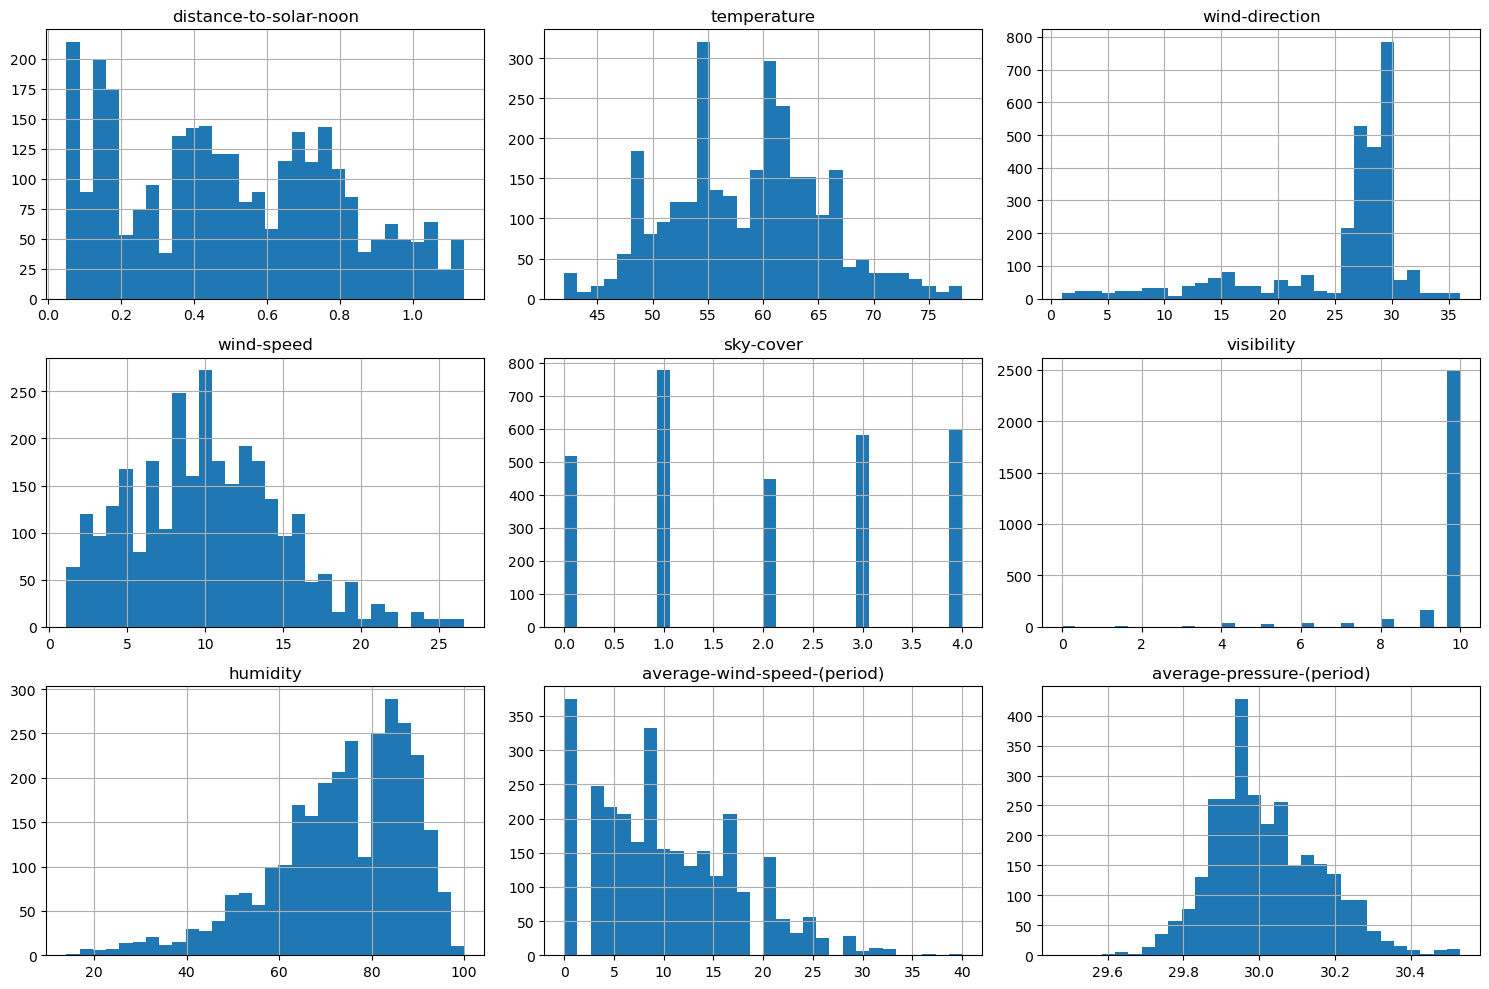

In [8]:
#Visualizing the Distribution of Variables

import matplotlib.pyplot as plt

# Here'power-generated' is the target variable
# Exclude the target variable and keep only numeric columns for the histograms
x_variables = data.drop('power-generated', axis=1).select_dtypes(include=[float, int])

# Plot histograms for each numerical X variable
x_variables.hist(bins=30, figsize=(15, 10))
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

In [9]:
# Calculate skewness for each numerical column in the DataFrame
skewness_values = data.select_dtypes(include=[float, int]).skew()
# Display the skewness values
print("Skewness of numerical variables:")
print(skewness_values)

Skewness of numerical variables:
distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
sky-cover                      0.080284
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.623017
average-pressure-(period)      0.441384
power-generated                1.307035
dtype: float64


In [10]:
# Calculate kurtosis for each numerical column in the DataFrame
kurtosis_values = data.select_dtypes(include=[float, int]).kurt()
#{Selects only the numeric columns (both float and int types) from the DataFrame, as kurtosis is typically calculated for numerical data}

# Display the kurtosis values
print("Kurtosis of numerical variables:")
print(kurtosis_values)

Kurtosis of numerical variables:
distance-to-solar-noon         -0.987306
temperature                    -0.287402
wind-direction                  1.856622
wind-speed                      0.078606
sky-cover                      -1.341456
visibility                     15.718494
humidity                        0.872219
average-wind-speed-(period)     0.016375
average-pressure-(period)       0.352309
power-generated                 0.342206
dtype: float64


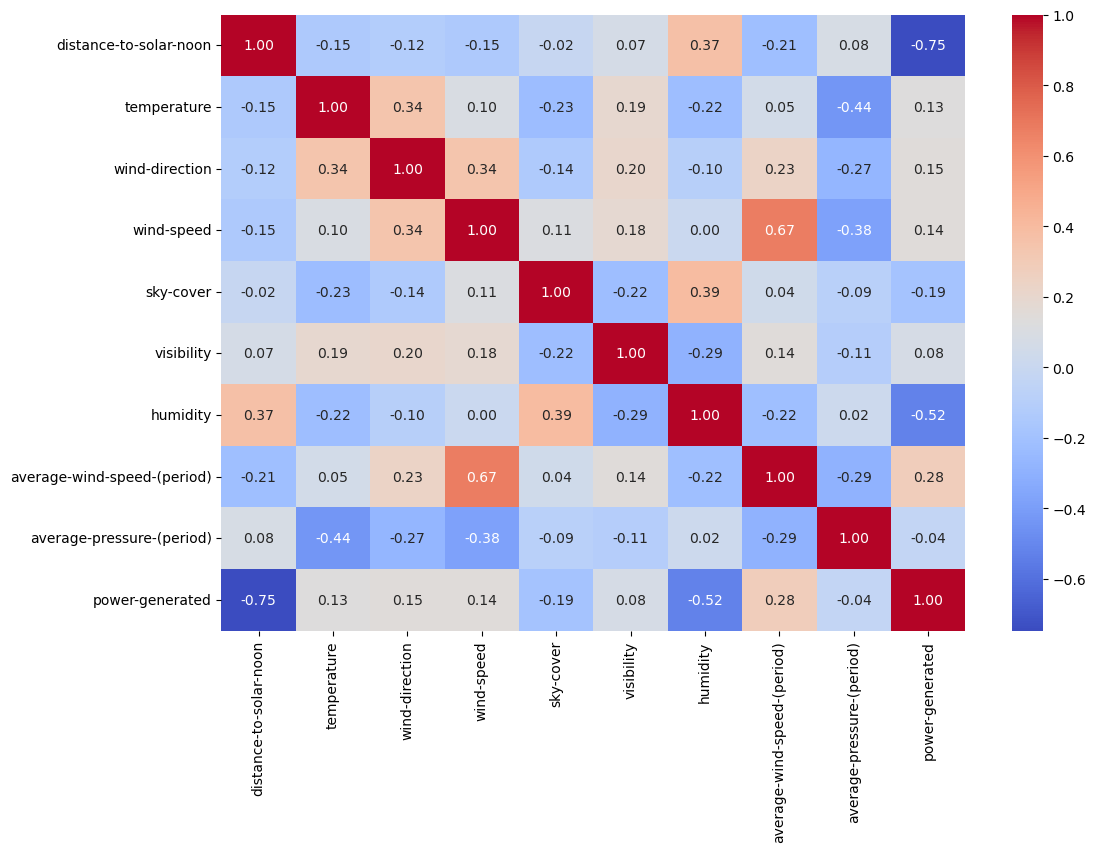

In [11]:
# Plot the correlation matrix

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

-->Strong Negative Correlation with Target:
 *distance-to-solar-noon has a strong negative correlation with power-generated (-0.75).
 *This suggests that as the distance to solar noon decreases, power generation increases,
#which makes sense considering that solar power generation is typically highest around solar noon

-->Moderate Negative Correlation:
 *humidity also shows a moderate negative correlation with power-generated (-0.52), 
  *indicating that higher humidity might be associated with lower power generation
    
-->Other correlations: 
*There are also some moderate correlations between predictor variables,
such as wind-speed and average-wind-speed-(period) (0.67), and temperature and average-pressure-(period) (-0.44). 
These indicate potential multicollinearity, which could be important to consider during when applying regularization
techniques in modeling


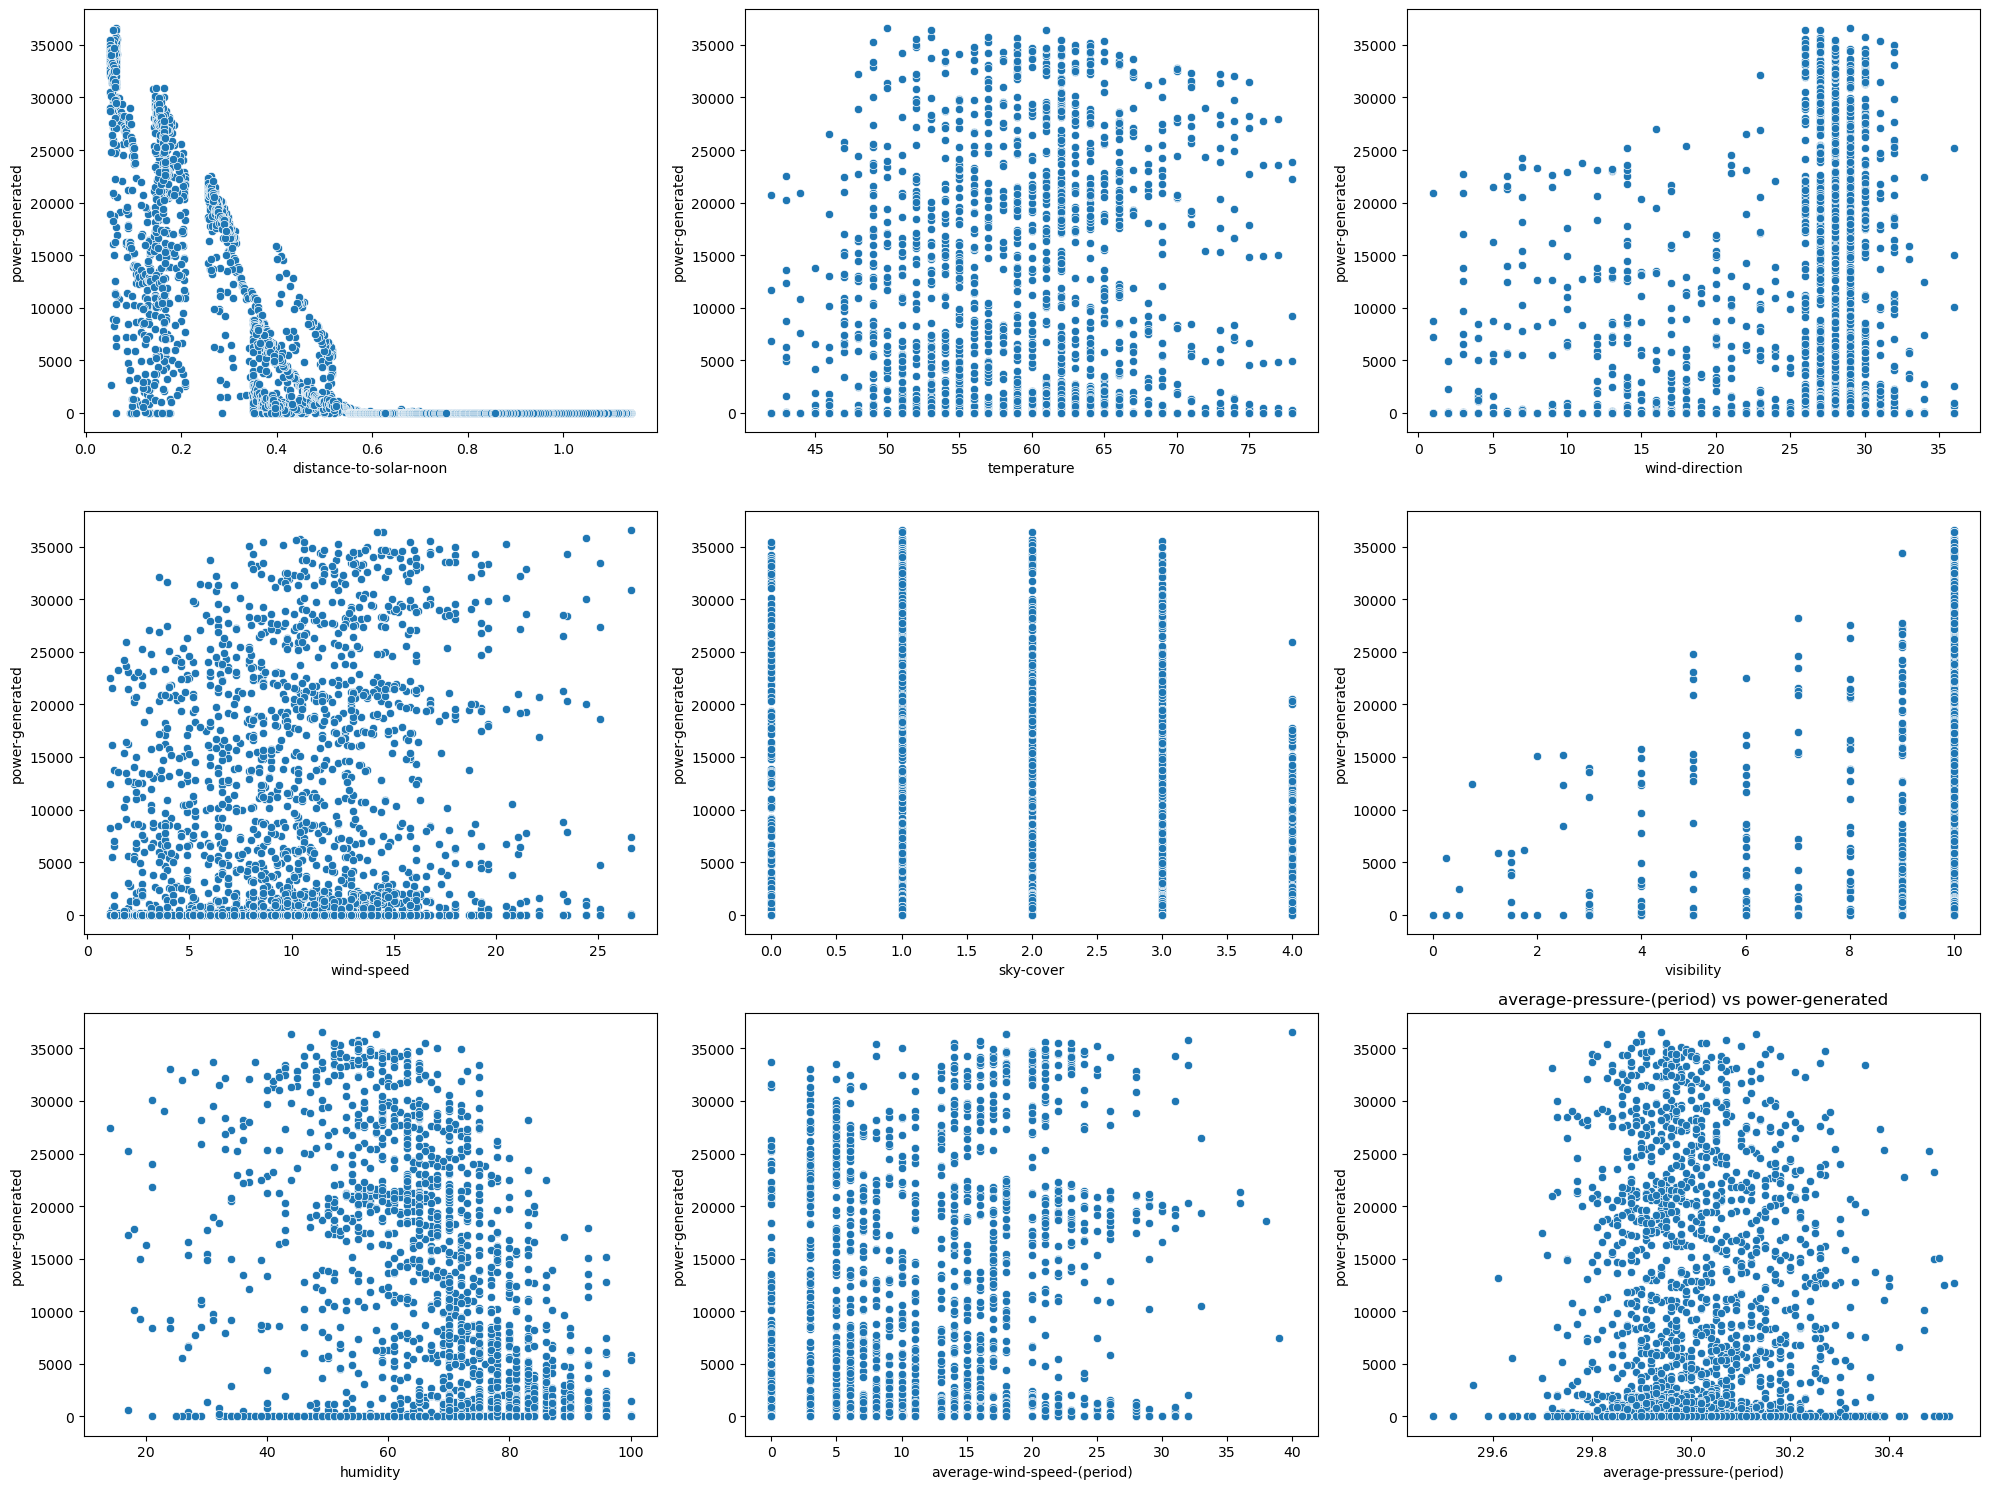

In [12]:
# Define the target variable 
target_var = 'power-generated'

# Set up the figure size
plt.figure(figsize=(20, 15))

# Loop through each predictor variable to create scatter plots
for i, col in enumerate(data.columns[:-1]):  # Exclude the last column (target variable)
    plt.subplot(3, 3, i+1)  # Create a subplot for each X variable (3x3 grid for 9 variables)
    
# Scatter plot of each predictor variable against the target variable
    sns.scatterplot(x=data[col], y=data[target_var])

# Set plot title and labels
plt.title(f'{col} vs {target_var}')
plt.xlabel(col)
plt.ylabel(target_var)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

C:\Users\ANUNAYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


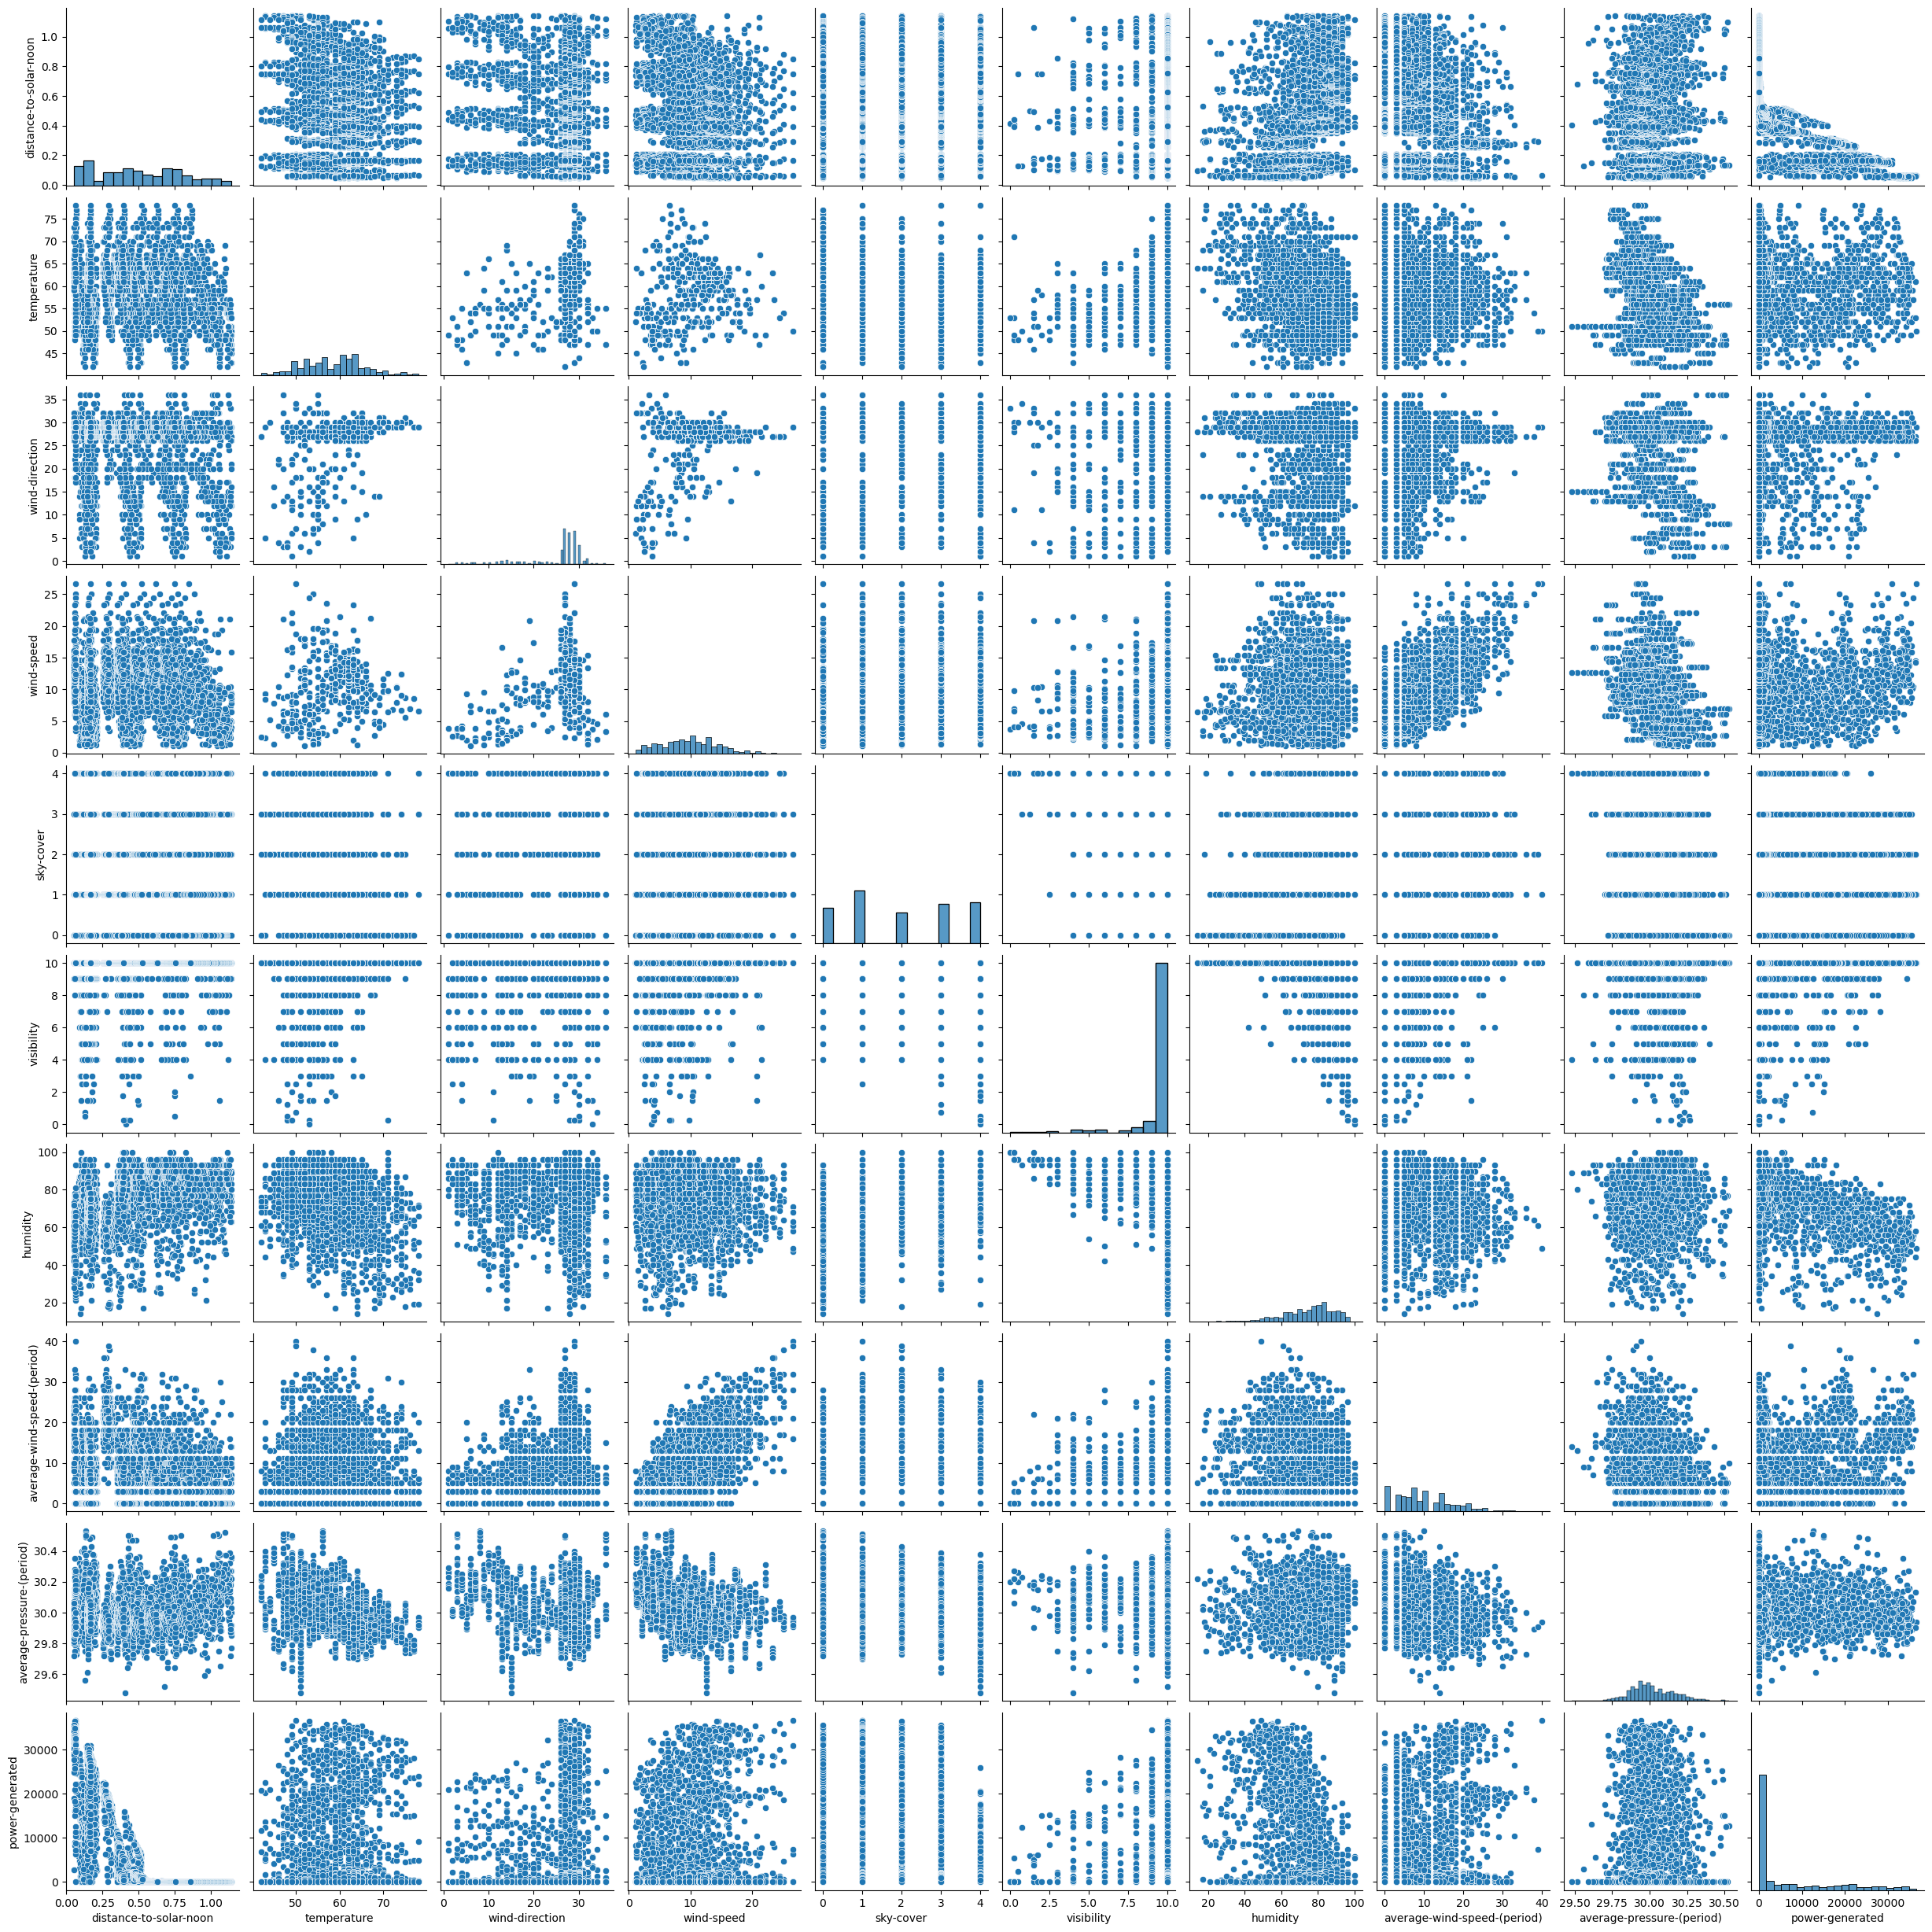

In [13]:
sns.pairplot(data)

### Renaming the Column names

In [14]:
data1=data.rename(columns={'distance-to-solar-noon':'distance_to_solar_noon','temperature':'temperature','wind-direction':'wind_direction','wind-speed':'wind_speed','sky-cover':'sky_cover','visibility':'visibility','humidity':'humidity','average-wind-speed-(period)':'average_wind_speed','average-pressure-(period)':'average_pressure','power-generated':'power_generated'})

In [15]:
list(data1.columns)

['distance_to_solar_noon',
 'temperature',
 'wind_direction',
 'wind_speed',
 'sky_cover',
 'visibility',
 'humidity',
 'average_wind_speed',
 'average_pressure',
 'power_generated']

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical features (if necessary)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.select_dtypes(include=['float64', 'int64']))
scaled_df = pd.DataFrame(scaled_data, columns=data1.select_dtypes(include=['float64', 'int64']).columns)

scaled_df.head()

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed,average_pressure,power_generated
0,1.196765,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.098597,-0.293310,-1.392859,-0.676960
1,0.420310,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.231271,-0.706587,-1.181564,-0.676960
2,-0.356146,1.539688,0.440639,-0.536861,-1.407962,0.319659,-0.233088,-1.395381,-0.899837,-0.151480
3,-1.132602,1.539688,0.440639,-0.536861,-1.407962,0.319659,-2.687555,-1.395381,-0.758974,1.793999
4,-1.469066,1.539688,0.440639,-0.536861,-1.407962,0.319659,-3.483598,-0.982104,-0.899837,2.239367


Explanation: Standardization is applied to the features using StandardScaler. This scales the features so they have a mean of 0 and a standard deviation of 1. Standardizing the features ensures that the model treats all features equally, which is especially important for distance-based algorithms and those sensitive to the scale of data (e.g., regression, neural networks).

In [17]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   distance_to_solar_noon  2920 non-null   float64
 1   temperature             2920 non-null   float64
 2   wind_direction          2920 non-null   float64
 3   wind_speed              2920 non-null   float64
 4   sky_cover               2920 non-null   float64
 5   visibility              2920 non-null   float64
 6   humidity                2920 non-null   float64
 7   average_wind_speed      2920 non-null   float64
 8   average_pressure        2920 non-null   float64
 9   power_generated         2920 non-null   float64
dtypes: float64(10)
memory usage: 228.3 KB


# Step 5: Identify Outliers


<Axes: >

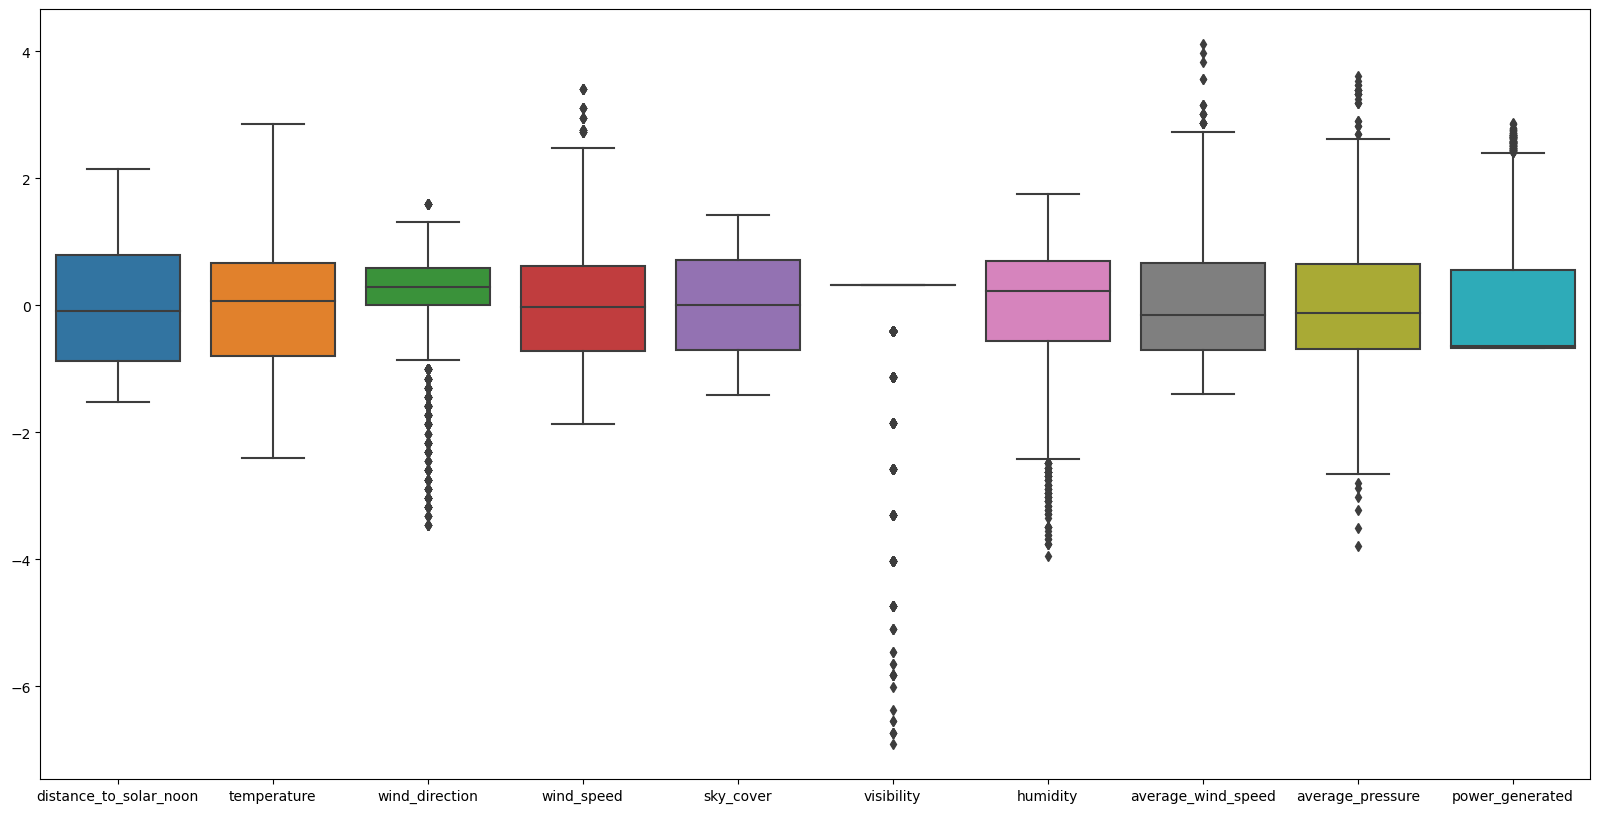

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(scaled_df)

In [19]:
# Detect outliers using the IQR method
Q1 = scaled_df.quantile(0.25)
Q3 = scaled_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
data_no_outliers = scaled_df[~((scaled_df < (Q1 - 1.5 * IQR)) |(scaled_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Dataset shape after removing outliers: {data_no_outliers.shape}")


Dataset shape after removing outliers: (1891, 10)


<Axes: >

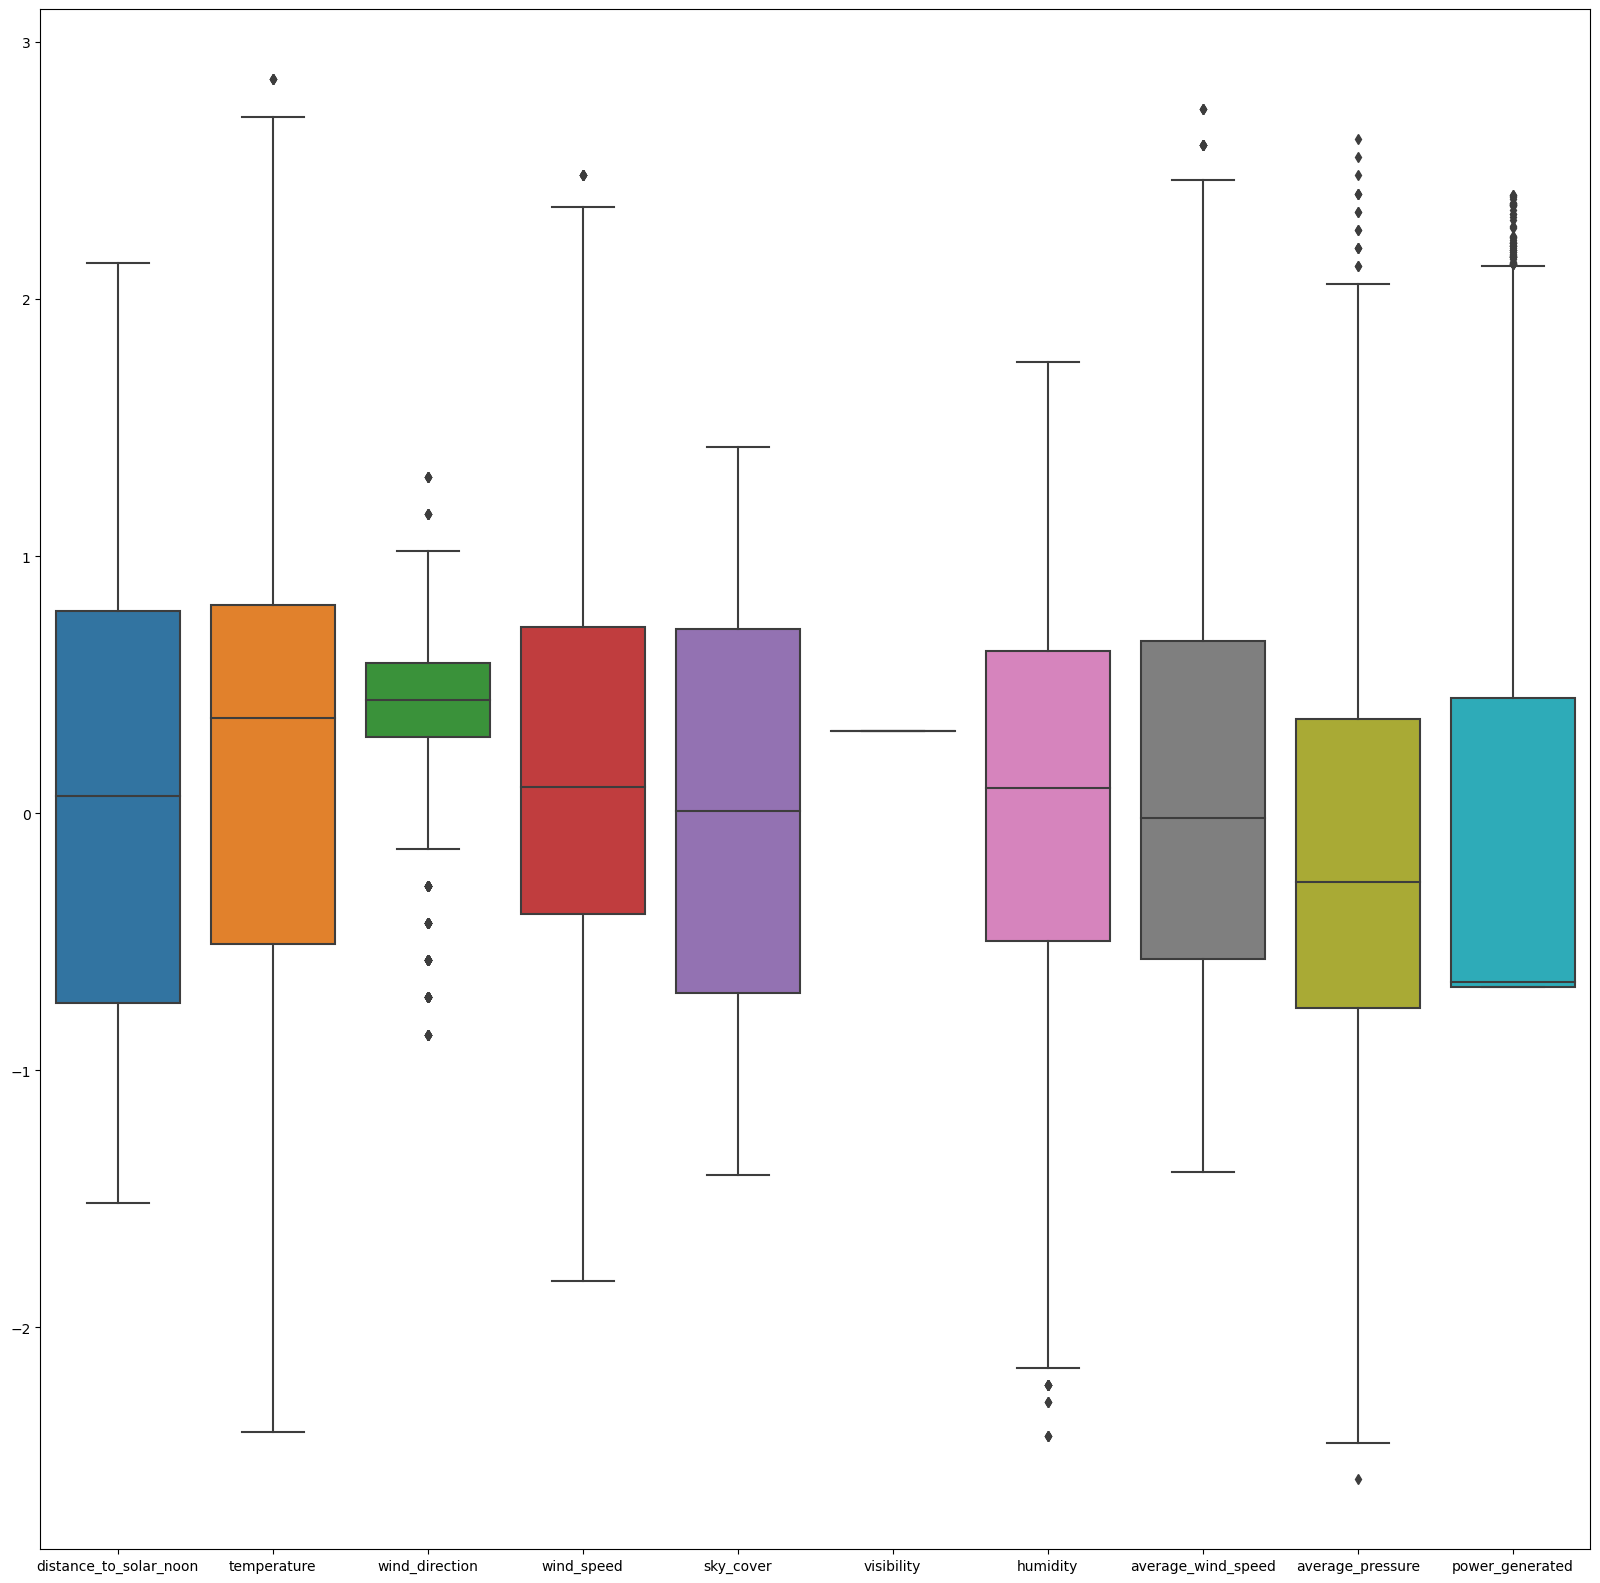

In [20]:
plt.figure(figsize=(20,20))
sns.boxplot(data_no_outliers)

In [25]:
# Detect outliers using the IQR method
Q1 = data_no_outliers.quantile(0.25)
Q3 = data_no_outliers.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
data_no_outliers1 = data_no_outliers[~((data_no_outliers < (Q1 - 1.5 * IQR)) |(data_no_outliers > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Dataset shape after removing outliers: {data_no_outliers1.shape}")

Dataset shape after removing outliers: (1622, 10)


## Step 6: Communicate Findings and Insights

Key Insights:


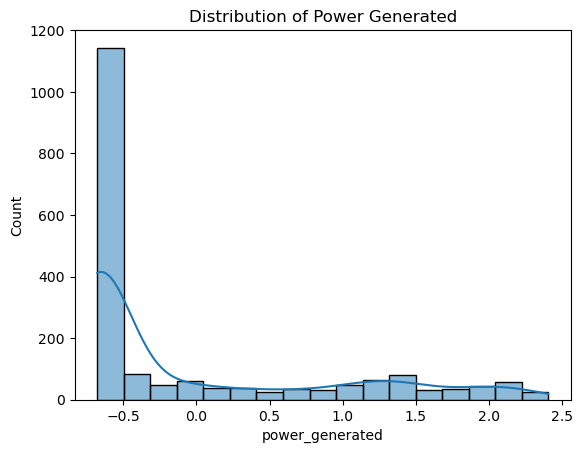

In [26]:
# Summarize the key findings
print("Key Insights:")
# Visualization examples
sns.histplot(data_no_outliers['power_generated'], kde=True)
plt.title('Distribution of Power Generated')
plt.show()

# Initial Analysis of the Data
# Dataset Overview:

* The dataset contains 2,920 entries and 10 columns.
* Most variables are numerical, and there's a mix of integer and float data types.

# Summary Statistics:

* The power-generated variable has a wide range, from 0 to 36,580, indicating a substantial variation in the target variable.
* Other variables like temperature, wind-speed, and humidity also show variability that might be important for analysis.
Next Steps
1. Handle the missing value in average-wind-speed-(period).
2. Explore data distributions and visualize relationships between variables.
3. Identify and handle outliers.

## Model Building

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Splitting the data into test and train sets

In [49]:
X = scaled_df.drop('power_generated', axis=1)
y = scaled_df['power_generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Explanation: The dataset is split into training and testing sets using an 80/20 split. The random_state=42 ensures reproducibility of the split. The training set is used to build the model, and the test set is used to evaluate its performance.

In [50]:
X

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed,average_pressure
0,1.196765,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.098597,-0.293310,-1.392859
1,0.420310,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.231271,-0.706587,-1.181564
2,-0.356146,1.539688,0.440639,-0.536861,-1.407962,0.319659,-0.233088,-1.395381,-0.899837
3,-1.132602,1.539688,0.440639,-0.536861,-1.407962,0.319659,-2.687555,-1.395381,-0.758974
4,-1.469066,1.539688,0.440639,-0.536861,-1.407962,0.319659,-3.483598,-0.982104,-0.899837
...,...,...,...,...,...,...,...,...,...
2915,-1.130442,0.662498,0.296005,0.786176,1.425428,0.319659,0.098597,-0.017792,-0.618111
2916,-1.474208,0.662498,0.296005,0.786176,-0.699615,0.319659,-0.498436,0.671002,-0.758974
2917,-0.700735,0.662498,0.296005,0.786176,0.008733,0.319659,-0.365762,1.497556,-0.970269
2918,0.072738,0.662498,0.296005,0.786176,0.008733,0.319659,0.496618,0.946520,-1.040701


In [51]:
y

0      -0.676960
1      -0.676960
2      -0.151480
3       1.793999
4       2.239367
          ...   
2915    0.001470
2916    2.183211
2917    0.996759
2918   -0.611299
2919   -0.676960
Name: power_generated, Length: 2920, dtype: float64

### Linear Regression

Explanation: This code creates a linear regression model and trains (fits) it using the scaled training data (X_train) and the target variable (y_train). Linear regression attempts to model the relationship between the features and the target variable by fitting a straight line to minimize the error between predicted and actual values.

In [52]:
# Model Building: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE:{mse}")
print(f"R^2 Score: {r2}")

MAE: 0.4831159927913142
RMSE: 0.6095219297501956
MSE:0.37151698284640233
R^2 Score: 0.6250592396092092


### Ridge Regression

Explanation: Ridge regression shrinks the coefficients by penalizing their magnitude (sum of squares). This leads to smaller coefficients and reduces the model's complexity.

In [54]:
from sklearn.linear_model import Ridge


# Initialize the model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

Ridge()

In [55]:
# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation Metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse = np.sqrt(mse_ridge)


print(f"Ridge Evaluation:\nMSE: {mse_ridge}\nRMSE: {rmse}\nMAE: {mae_ridge}\nR²: {r2_ridge}")

Ridge Evaluation:
MSE: 0.3715195572356571
RMSE: 0.6095240415567356
MAE: 0.48309441456106156
R²: 0.6250566414952351


### Lasso Regression

Lasso regression adds a penalty that is proportional to the absolute value of the coefficients (sum of absolute values). This encourages some coefficients to be exactly zero, effectively performing feature selection by excluding certain predictors from the model.

In [56]:
from sklearn.linear_model import Lasso


# Initialize the model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [57]:
# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluation Metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse = np.sqrt(mse_lasso)


print(f"Lasso Evaluation:\nMSE: {mse_lasso}\nRMSE: {rmse}\nMAE: {mae_lasso}\nR²: {r2_lasso}")

Lasso Evaluation:
MSE: 0.3914658091019566
RMSE: 0.6256722857071078
MAE: 0.4922382956527816
R²: 0.6049265715738057


### ElasticNetCV Regression

ElasticNetCV combines L1 (Lasso) and L2 (Ridge) regularization penalties in regression and automatically tunes hyperparameters using cross-validation.

Helps in preventing overfitting, especially when there are many correlated predictors.

In [58]:
from sklearn.linear_model import ElasticNetCV

# ElasticNetCV Regression
elastic_net_model = ElasticNetCV(cv=5, random_state=42)
elastic_net_model.fit(X_train, y_train)

ElasticNetCV(cv=5, random_state=42)

In [59]:
# Make Predictions
y_pred = elastic_net_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("ElasticNetCV Regression")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

ElasticNetCV Regression
MAE: 0.4829939575152573
MSE: 0.37141418317074587
RMSE: 0.609437595796933
R^2: 0.6251629866526505


### Decision tree

Explanation: Decision Tree Regression is a non-linear machine learning algorithm used for predicting a continuous target variable. Unlike linear regression, which assumes a linear relationship between the features and the target, decision tree regression makes no such assumptions, making it a flexible and powerful method for modeling complex relationships.

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
# Make Predictions
y_pred_tree = tree_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tree)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE:{mse}")
print(f"R^2 Score: {r2}")

MAE: 0.19377573390886907
RMSE: 0.42790315497905623
MSE:0.18310111004103022
R^2 Score: 0.8152114907340189


### Random Forest

Explanation: This initializes a random forest regressor model. Random forests are an ensemble of decision trees, where multiple trees are trained on different subsets of the data and their predictions are averaged to make the final prediction. The random_state=42 ensures reproducibility of the model

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Make Predictions
y_pred_forest = forest_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred_forest)
mse = mean_squared_error(y_test, y_pred_forest)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_forest)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MSE:{mse}")
print(f"R^2 Score: {r2}")

MAE: 0.15020863654539182
RMSE: 0.3300984884590723
MSE:0.1089650120829643
R^2 Score: 0.8900308024323362


### Support Vector Regressor(SVR):

SVR is well-suited for datasets where the relationship between features and the target is non-linear. Solar power generation could have complex dependencies on environmental factors, and SVR can use kernel tricks (e.g., RBF kernel) to model these complexities.

In [64]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

SVR()

In [65]:
# Make predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluation Metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
rmse = np.sqrt(mse_svr)


print(f"SVR Evaluation:\nMSE: {mse_svr}\nRMSE: {rmse}\nMAE: {mae_svr}\nR²: {r2_svr}")

SVR Evaluation:
MSE: 0.12289199186852677
RMSE: 0.3505595411175208
MAE: 0.20253619650755397
R²: 0.875975476210803


### Gradient Boost Regressor:

Gradient Boosting builds decision trees in a sequential manner, which allows it to capture complex patterns in the dataset. Given the nature of solar power generation data (likely involving interactions between environmental variables), Gradient Boosting is well-suited to learn these interactions effectively.
Gradient Boosting will likely perform well in capturing non-linear relationships and dependencies in the environmental variables. It's a solid choice, especially for medium-sized datasets with some complexity.

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr_model = GradientBoostingRegressor()

# Train the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [92]:
# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

# Evaluation Metrics
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Evaluation:\nMSE: {mse_gbr}\nRMSE: {rmse}\nMAE: {mae_gbr}\nR²: {r2_gbr}\n")

Gradient Boosting Evaluation:
MSE: 0.09828778829326061
RMSE: 0.31350883287917203
MAE: 0.1629842857088117
R²: 0.9008064239823994



### XGBoost Regressor:

XGBoost is an optimized version of Gradient Boosting. It’s highly efficient and fast, especially on larger datasets. It also includes built-in regularization, making it less prone to overfitting compared to traditional Gradient Boosting.

XGBoost is likely the best choice given the medium size and the potential complexity of the data. It will train faster than Gradient Boosting, is less prone to overfitting, and can handle missing data efficiently if any exist.

In [93]:
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [94]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Evaluation:\nMSE: {mse_xgb}\nRMSE: {rmse}\nMAE: {mae_xgb}\nR²: {r2_xgb}\n")

XGBoost Evaluation:
MSE: 0.09824093013617133
RMSE: 0.31343409217277457
MAE: 0.15720854297338224
R²: 0.9008537139687547



### K- Nearest Neighbors Regressor (KNN):

KNN is a simple algorithm that can work well for small datasets with clear patterns. It doesn’t assume any functional form between the features and the target.

KNN may not be the best choice due to the dataset size and the potential complexity of the data. It’s likely to be outperformed by models like XGBoost or Gradient Boosting, especially in terms of efficiency and accuracy.

In [95]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [96]:
# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation Metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Evaluation:\nMSE: {mse_knn}\nRMSE: {rmse}\nMAE: {mae_knn}\nR²: {r2_knn}\n")

KNN Evaluation:
MSE: 0.18291566974900134
RMSE: 0.42768641520277606
MAE: 0.24099622551916167
R²: 0.8153986399823997



### Bayesian Ridge Regression

Bayesian Ridge Regression applies Bayesian inference to linear regression. It estimates the distribution of model parameters rather than point estimates, providing a probabilistic approach.

Provides uncertainty estimation for predictions and can prevent overfitting by including regularization as part of the Bayesian framework.

In [97]:
from sklearn.linear_model import BayesianRidge

# Bayesian Ridge Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

BayesianRidge()

In [98]:
# Make Predictions
y_pred = bayesian_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Bayesian Ridge Regression")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

Bayesian Ridge Regression
MAE: 0.4829835638089121
MSE: 0.37153572421395586
RMSE: 0.6095373033817995
R^2: 0.6250403255274155


### Neural Network Regression

 Neural Network Regression, using Multi-Layer Perceptron (MLP), is a feedforward neural network model that can learn complex non-linear relationships between inputs and outputs.

Highly flexible and can approximate any continuous function, capable of learning from large datasets.

In [99]:
from sklearn.neural_network import MLPRegressor

# Neural Network Regression
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [100]:
# Make Predictons
y_pred = nn_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Neural Network Regression")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

Neural Network Regression
MAE: 0.20182856011395048
MSE: 0.13177883988360078
RMSE: 0.3630135533056594
R^2: 0.8670067299459067


### Huber Regression

Huber Regression is a robust regression model that combines the best properties of both Least Squares and Least Absolute Deviations methods. It is less sensitive to outliers than standard linear regression.

Less sensitive to outliers while being relatively efficient for normally distributed data.

In [101]:
from sklearn.linear_model import HuberRegressor

# Huber Regression
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)

HuberRegressor()

In [102]:
# Make Predictons
y_pred = huber_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Huber Regression")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

Huber Regression
MAE: 0.4721402142615031
MSE: 0.37920129311896267
RMSE: 0.6157932226965174
R^2: 0.6173041132766298


## Model Evaluation

In [103]:
# Evaluation metrics
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} -\n MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}\n")

evaluate_model("XGBoost Regression", y_test, y_pred_xgb)
evaluate_model("Gradient Boost Regression", y_test, y_pred_gbr)
evaluate_model("Random Forest", y_test, y_pred_forest)
evaluate_model("SVR", y_test, y_pred_svr)
evaluate_model("Neural Network", y_test, y_pred)

XGBoost Regression -
 MSE: 0.0982, RMSE: 0.3134, MAE: 0.1572, R²: 0.9009

Gradient Boost Regression -
 MSE: 0.0983, RMSE: 0.3135, MAE: 0.1630, R²: 0.9008

Random Forest -
 MSE: 0.1090, RMSE: 0.3301, MAE: 0.1502, R²: 0.8900

SVR -
 MSE: 0.1229, RMSE: 0.3506, MAE: 0.2025, R²: 0.8760

Neural Network -
 MSE: 0.3792, RMSE: 0.6158, MAE: 0.4721, R²: 0.6173



XGBoost: XGBoost is a high-performing model, offering a balance of low error rates and high variance explanation. It's a great choice for this regression task.

###### XGBoost is the best model for this dataset